<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Life_Expectancy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=16c8c3e6edb8f5fe1abfc74bce2ea86268df5431362c10863ac4aca51f5d231f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize
life_expectancy = pd.read_csv("Life Expectancy Data.csv") #reading the file
life_expectancy.head()

<ipython-input-3-46c6c19e5495>:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
life_expectancy.rename(columns = {" BMI " :"BMI",
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [7]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   Infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_five_deaths                2938 non-null   int64  
 12  Polio               

In [8]:
print(life_expectancy.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [9]:
life_expectancy.reset_index(inplace=True)
life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
imputed_data = []
for year in list(life_expectancy.Year.unique()):
    year_data = life_expectancy[life_expectancy.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
life_expectancy = pd.concat(imputed_data).copy()

<ipython-input-9-7a61c0fec44f>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
<ipython-input-9-7a61c0fec44f>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
<ipython-input-9-7a61c0fec44f>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
<ipython-input-9-7a61c0fec44f>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and

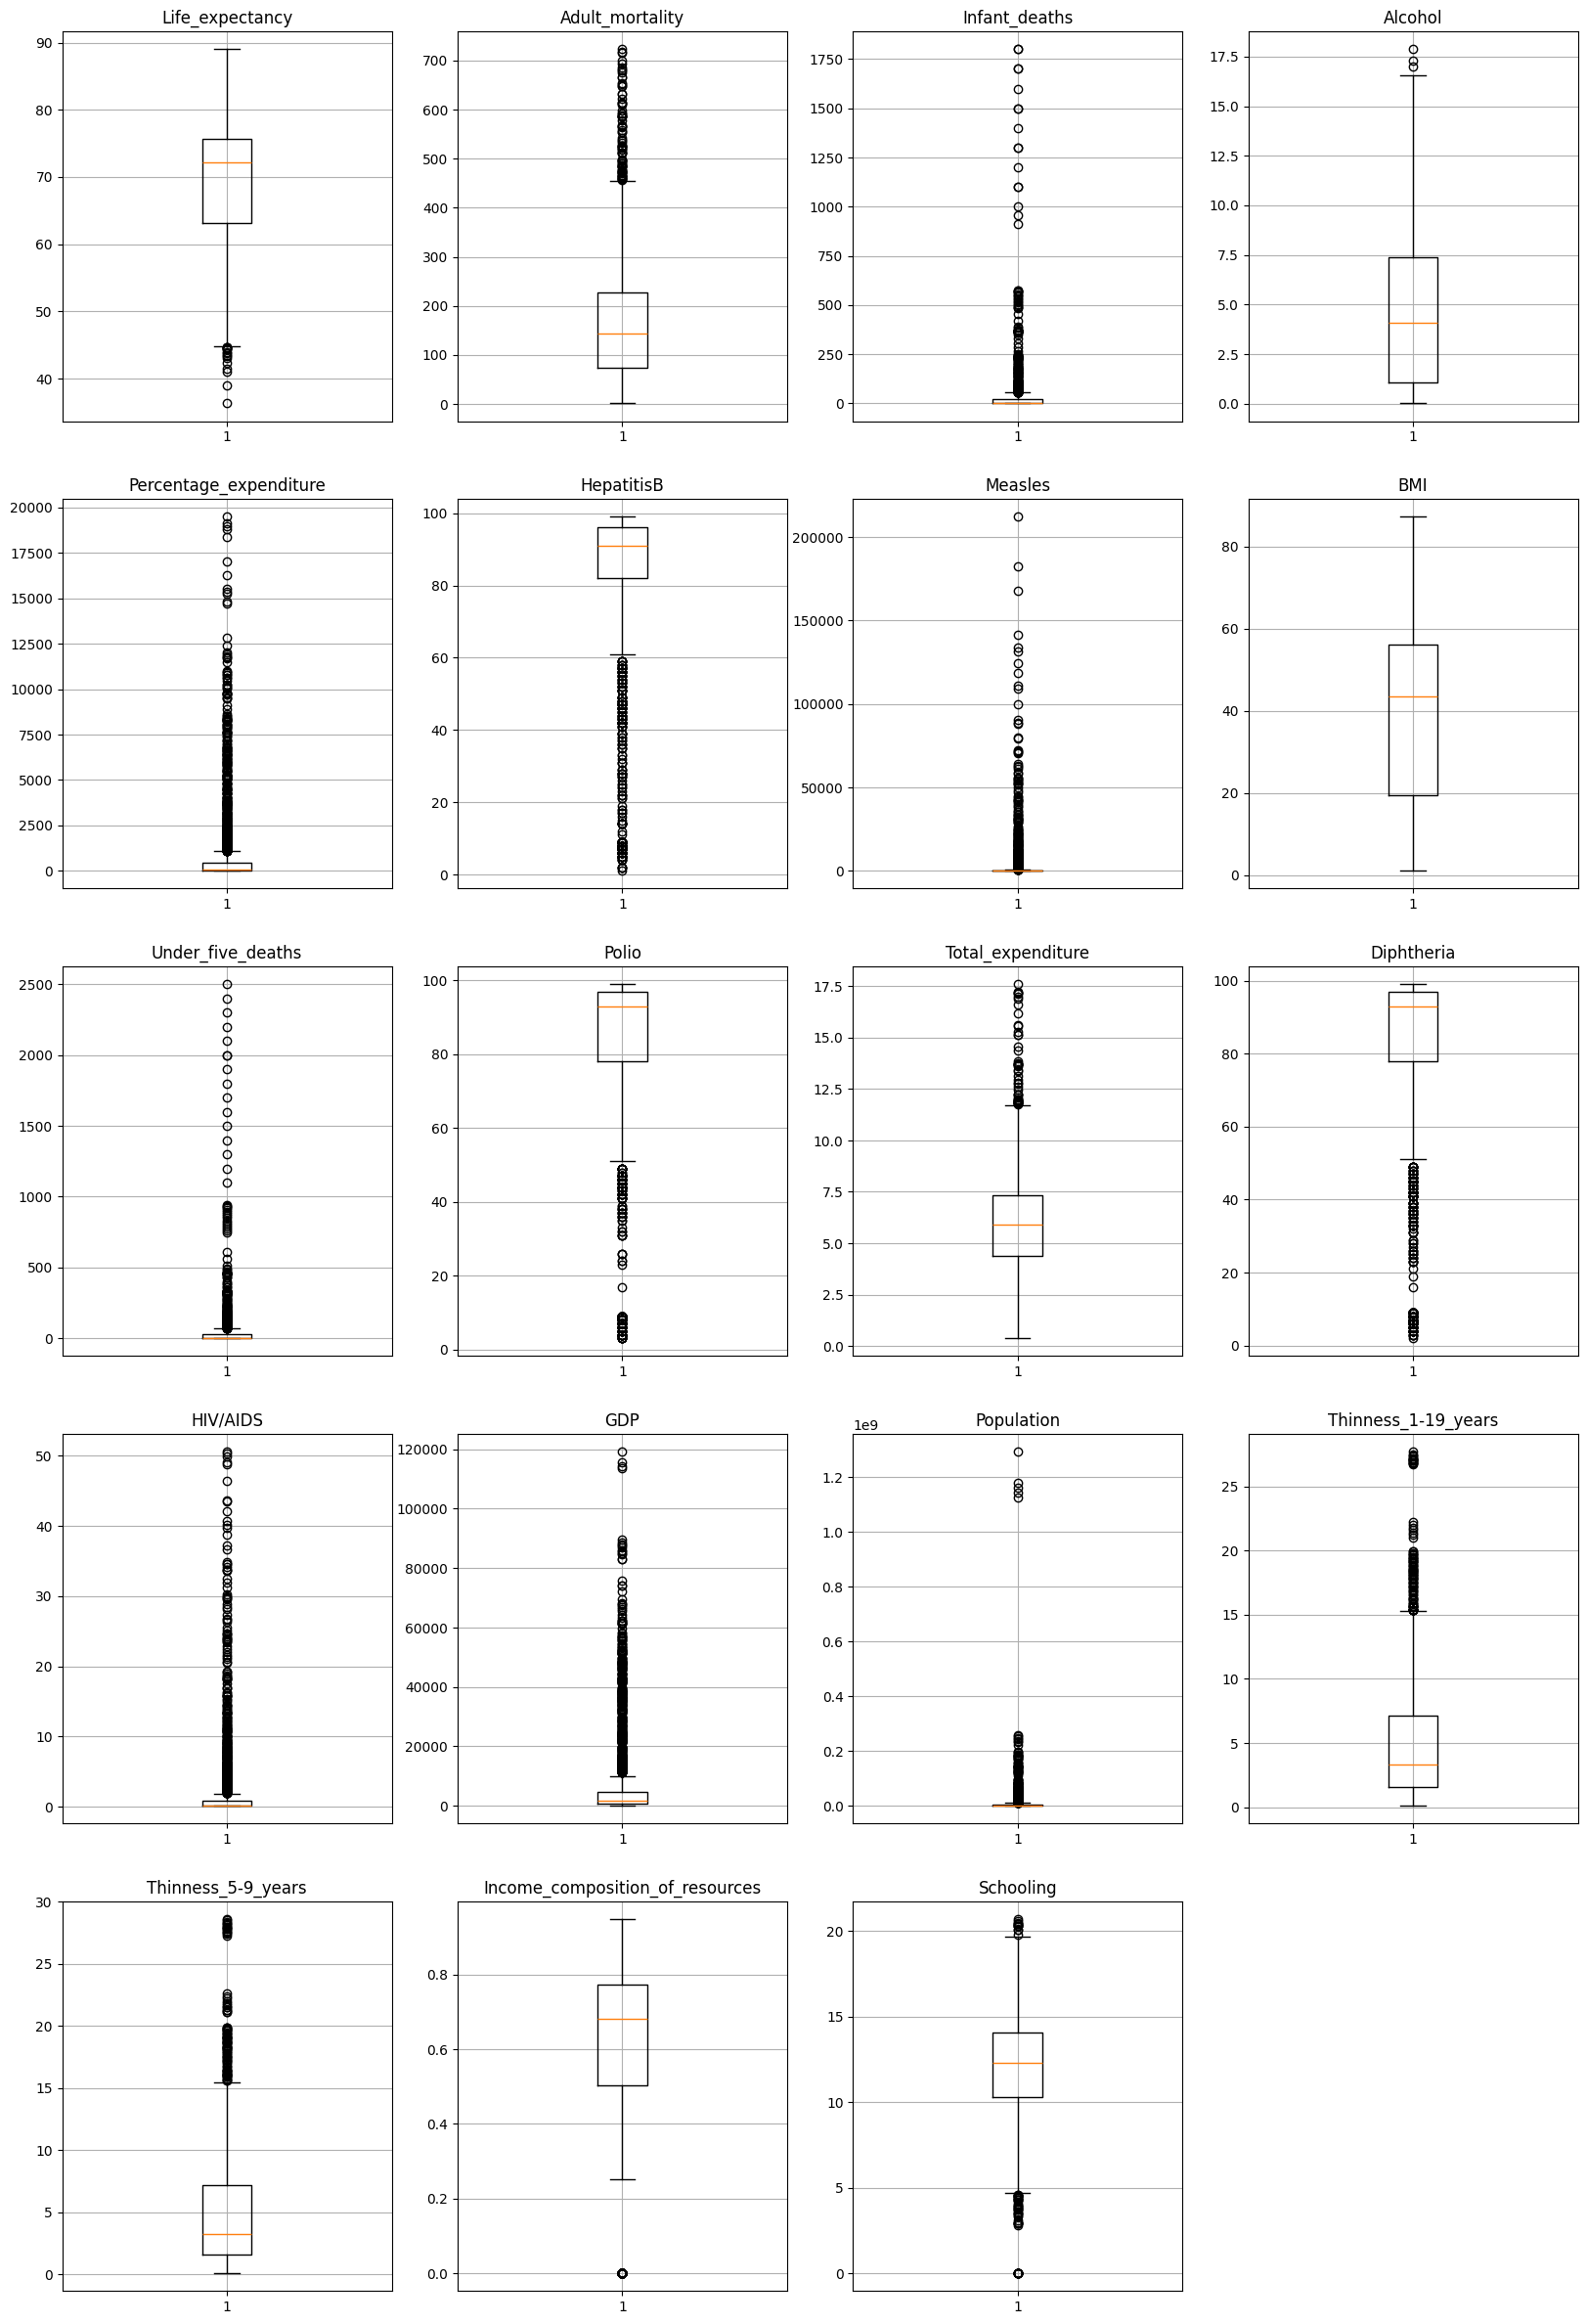

In [10]:
col_dict = {'Life_expectancy':1,'Adult_mortality':2,'Infant_deaths':3,'Alcohol':4,'Percentage_expenditure':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_five_deaths':9,'Polio':10,'Total_expenditure':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'Thinness_1-19_years':16,'Thinness_5-9_years':17,'Income_composition_of_resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_expectancy[variable])
                     plt.title(variable)
                     plt.grid(True)

plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


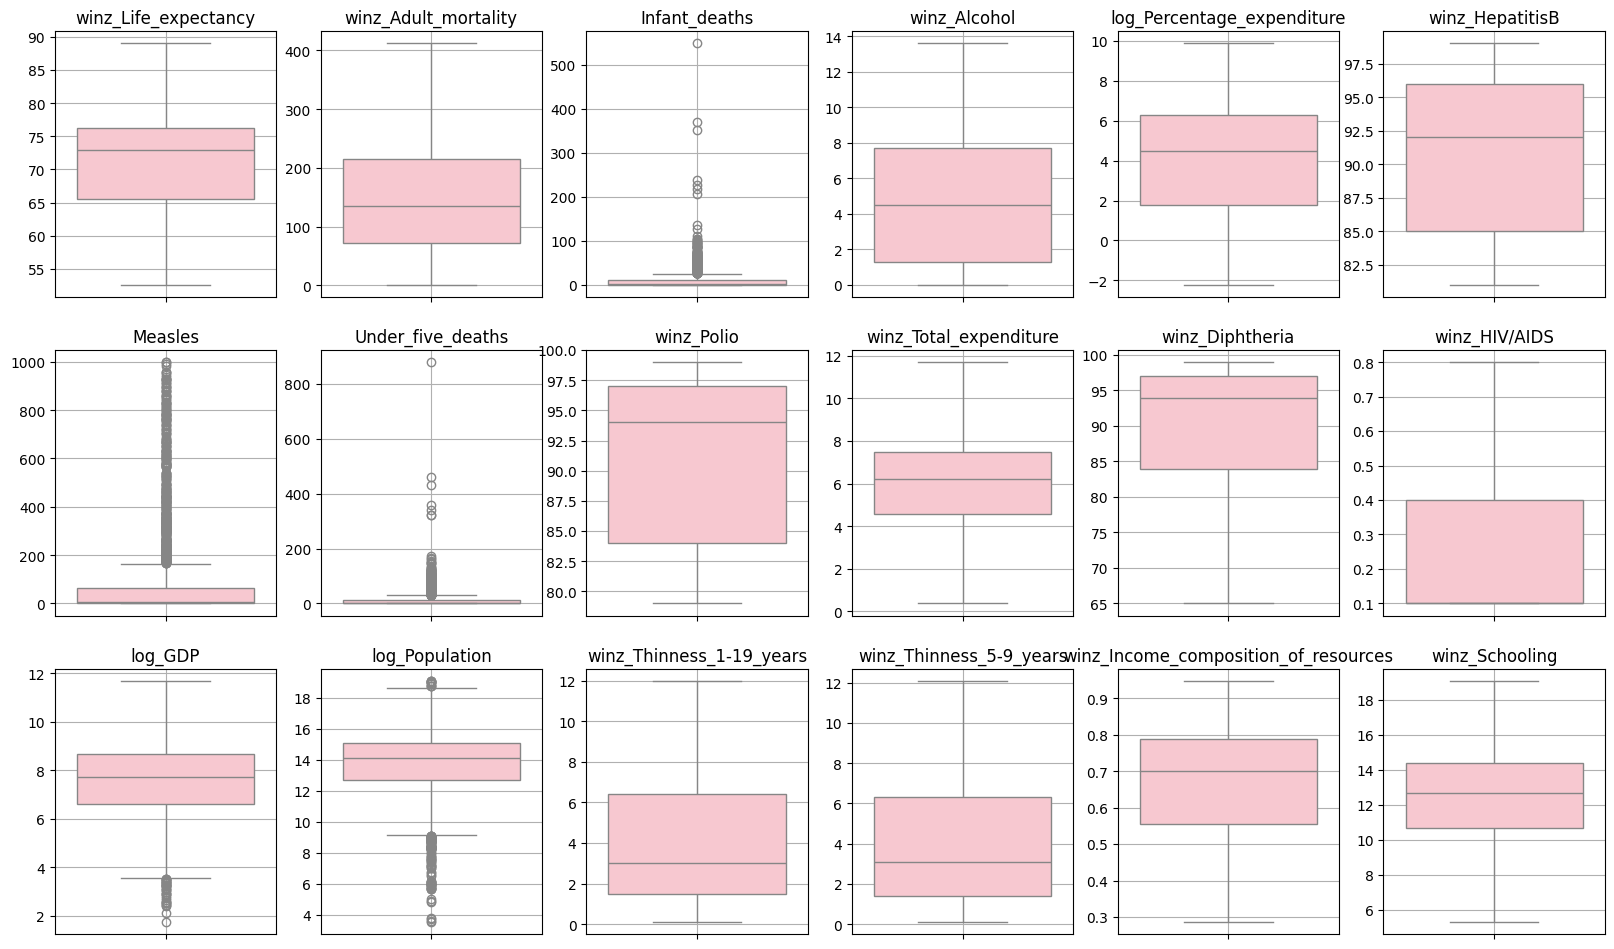

In [11]:
life_expectancy = life_expectancy[life_expectancy['Infant_deaths'] < 1001]
life_expectancy = life_expectancy[life_expectancy['Measles'] < 1001]
life_expectancy = life_expectancy[life_expectancy['Under_five_deaths'] < 1001]

life_expectancy.drop(['BMI'], axis=1, inplace=True)
life_expectancy['log_Percentage_expenditure'] = np.log(life_expectancy['Percentage_expenditure'])
life_expectancy['log_Population'] = np.log(life_expectancy['Population'])
life_expectancy['log_GDP'] = np.log(life_expectancy['GDP'])
life_expectancy = life_expectancy.replace([np.inf, -np.inf], 0)
life_expectancy['log_Percentage_expenditure']

life_expectancy['winz_Life_expectancy'] = winsorize(life_expectancy['Life_expectancy'], (0.05,0))
life_expectancy['winz_Adult_mortality'] = winsorize(life_expectancy['Adult_mortality'], (0,0.04))
life_expectancy['winz_Alcohol'] = winsorize(life_expectancy['Alcohol'], (0.0,0.01))
life_expectancy['winz_HepatitisB'] = winsorize(life_expectancy['HepatitisB'], (0.20,0.0))
life_expectancy['winz_Polio'] = winsorize(life_expectancy['Polio'], (0.20,0.0))
life_expectancy['winz_Total_expenditure'] = winsorize(life_expectancy['Total_expenditure'], (0.0,0.02))
life_expectancy['winz_Diphtheria'] = winsorize(life_expectancy['Diphtheria'], (0.11,0.0))
life_expectancy['winz_HIV/AIDS'] = winsorize(life_expectancy['HIV/AIDS'], (0.0,0.21))
life_expectancy['winz_Thinness_1-19_years'] = winsorize(life_expectancy['Thinness_1-19_years'], (0.0,0.04))
life_expectancy['winz_Thinness_5-9_years'] = winsorize(life_expectancy['Thinness_5-9_years'], (0.0,0.04))
life_expectancy['winz_Income_composition_of_resources'] = winsorize(life_expectancy['Income_composition_of_resources'], (0.05,0.0))
life_expectancy['winz_Schooling'] = winsorize(life_expectancy['Schooling'], (0.03,0.01))

col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'Infant_deaths':3,'winz_Alcohol':4,
            'log_Percentage_expenditure':5,'winz_HepatitisB':6,'Measles':7,'Under_five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_GDP':13,'log_Population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}


fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = life_expectancy[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')

                     plt.grid(True)

plt.show()

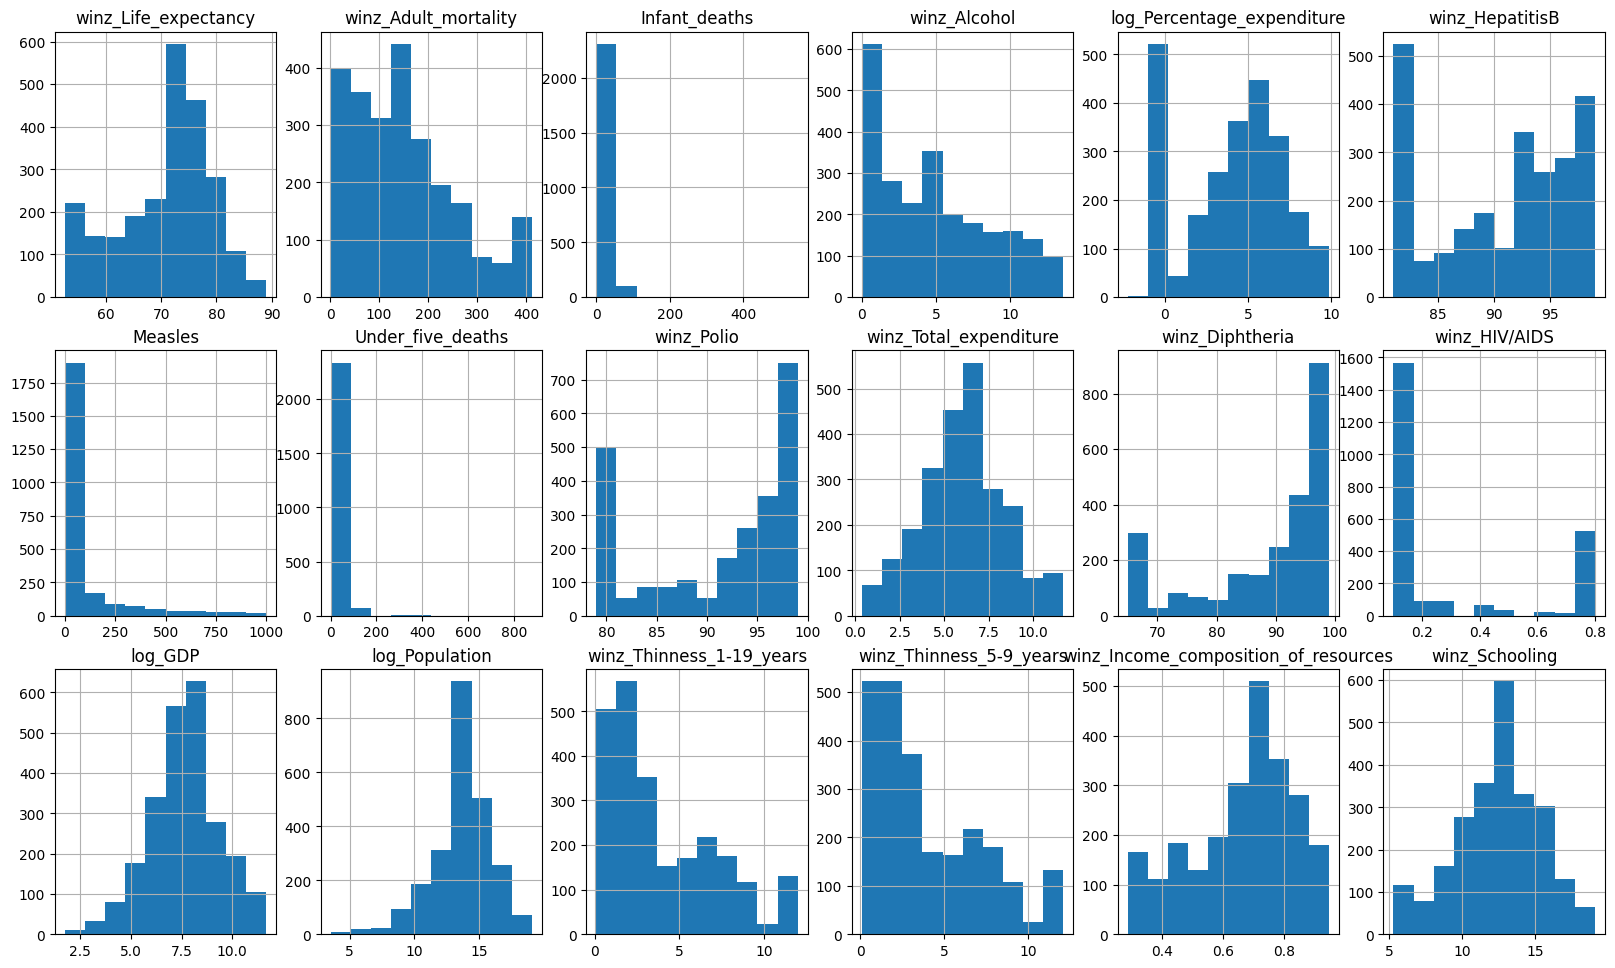

In [12]:
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     plt.hist(life_expectancy[variable])
                     plt.title(variable)
                     plt.ylabel('')

                     plt.grid(True)

plt.show()

<Axes: >

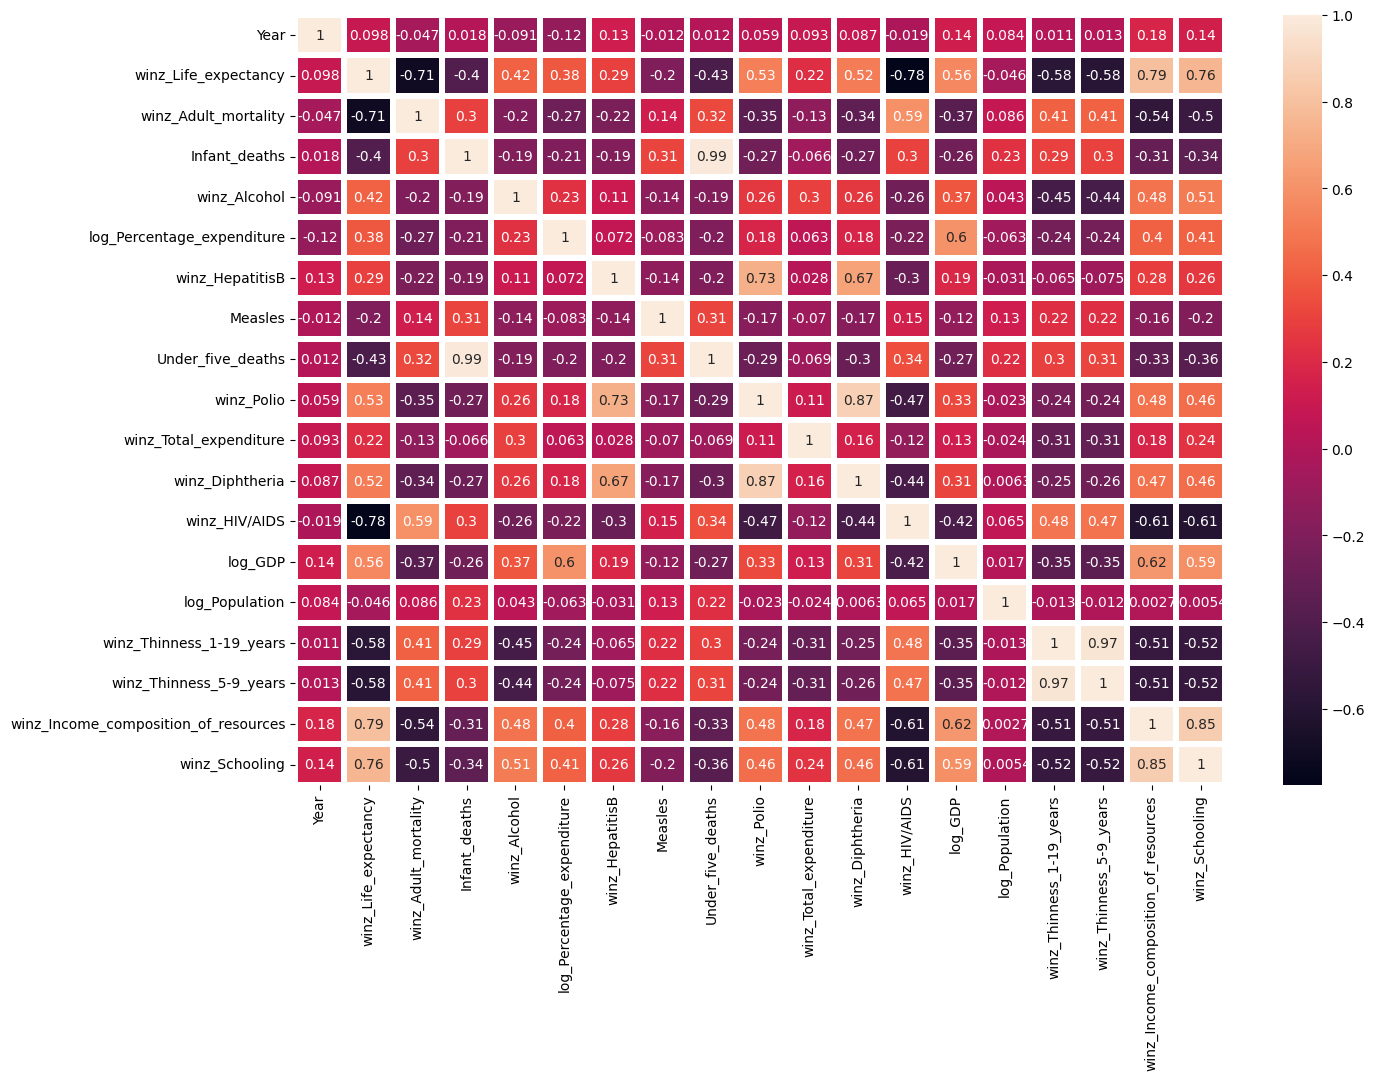

In [14]:
life_exp = life_expectancy[['Year', 'winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_HepatitisB','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']] # Removing 'Country' and 'Status' columns
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

In [16]:
status_life_exp = life_expectancy.groupby(by=['Status'])['winz_Life_expectancy'].mean().reset_index().sort_values('winz_Life_expectancy',ascending=False).reset_index(drop=True)
# Selecting only the 'winz_Life_expectancy' column for calculating the mean
plt.figure(figsize=(20,10))

fig = px.bar(status_life_exp, x='Status', y='winz_Life_expectancy',color='winz_Life_expectancy')

fig.update_layout(
        title="Life expectancy according to status",
        xaxis_title="Status",
        yaxis_title="Average Life Expectancy",
        font=dict(
            family="Courier New",
            size=16,
            color="black"
        )
    )
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [18]:
life_year = life_expectancy.groupby(by = ['Year', 'Status'])[['winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_HepatitisB','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']].mean().reset_index() # Selecting only numeric columns for calculating the mean
Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]
fig1 = go.Figure()
for template in ["plotly_dark"]:
    fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['winz_Life_expectancy'],
                    mode='lines',
                    name='Developing',
                    marker_color='#f075c2'))
    fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['winz_Life_expectancy'],
                    mode='lines',
                    name='Developed',
                    marker_color='#28d2c2'))
    fig1.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life expectancy in age',
    title_text='Average Life expectancy of Developing and Developed countries over the years',
    template=template)
fig1.show()